<a href="https://colab.research.google.com/github/kanyakornvee/CWT/blob/main/Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install pystan==2.19.1.1
!pip uninstall fbprophet
!pip install cmdstanpy==0.9.68
!pip install prophet

Found existing installation: fbprophet 0.7.1
Uninstalling fbprophet-0.7.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/fbprophet-0.7.1-py3.7.egg-info
    /usr/local/lib/python3.7/dist-packages/fbprophet/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/fbprophet/stan_model/prophet_model.pkl
Proceed (y/n)? y
  Successfully uninstalled fbprophet-0.7.1


In [7]:
import pandas as pd
import sklearn as sk
from prophet import Prophet

In [32]:
df = pd.read_csv('/content/CWT/provider_level_data.csv')
df.head()
df.rename({'period': 'ds', 'performance': 'y'}, axis=1, inplace=True)
df['y'] = round(df['y']*100, 2)
df = df[df.cancer_type == "ALL CANCERS"]
df = df.drop(["cancer_type", "provider_name", "provider_code"], axis=1)
df['ds']= pd.to_datetime(df['ds'])

In [42]:
df['region_name'].fillna("Unknown", inplace = True)
df['region_name'] = pd.Categorical(df['region_name'],
                                   categories=["Unknown",
                                               "LONDON COMMISSIONING REGION",
                                               "MIDLANDS AND EAST OF ENGLAND COMMISSIONING REGION",
                                               "NORTH OF ENGLAND COMMISSIONING REGION",
                                               "SOUTH OF ENGLAND COMMISSIONING REGION"],ordered=True)
df['standard'] = pd.Categorical(df['standard'],
                                categories=["28 Days FDS",
                                            "28 Days FDS (By Route)",
                                            "2WW",
                                            "2WW Breast",
                                            "31 Days",
                                            "31 Days Sub (Drugs)",
                                            "31 Days Sub (Radio)",
                                            "31 Days Sub (Surgery)",
                                            "62 Days",
                                            "62 Days (Consultant)",
                                            "62 Days (Screening)",
                                            "62 Days (Upgrade)",],ordered=True)
df.head()

,ds,region_name,standard,total_treated,within_standard,breaches,y
3324,2016-01-01,Unknown,31 Days,3.0,3.0,0.0,100.00
3326,2016-01-01,Unknown,31 Days,31.0,24.0,7.0,77.42
3327,2016-01-01,Unknown,31 Days,1.0,0.0,1.0,0.00
3328,2016-01-01,Unknown,31 Days,2.0,2.0,0.0,100.00
3332,2016-01-01,Unknown,31 Days,5.0,5.0,0.0,100.00


In [43]:
df['ds']. value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128154 entries, 3324 to 705529
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ds               128154 non-null  datetime64[ns]
 1   region_name      128154 non-null  category      
 2   standard         128154 non-null  category      
 3   total_treated    128154 non-null  float64       
 4   within_standard  128154 non-null  float64       
 5   breaches         128154 non-null  float64       
 6   y                128154 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(4)
memory usage: 6.1 MB


In [44]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
future = m.make_future_dataframe(periods= 12 , freq='M')
future.tail()


,ds
78,2022-06-30
79,2022-07-31
80,2022-08-31
81,2022-09-30
82,2022-10-31


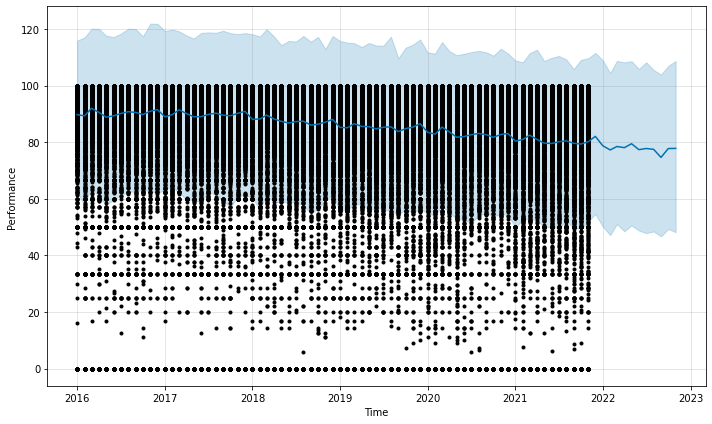

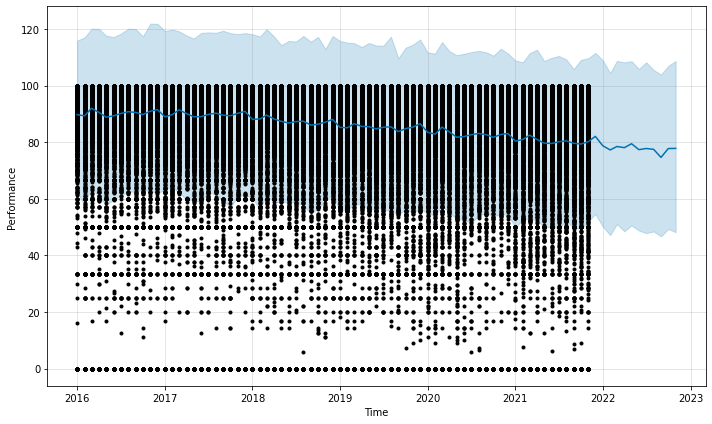

In [47]:
forecast_m = m.predict(future)
m.plot(forecast_m,xlabel='Time',
       ylabel='Performance')